In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
l = 2000
n = 20
g = 2.

In [3]:
from sklearn.preprocessing import OneHotEncoder
m = 5 # categorical number for each variables
# initial s (categorical variables)
x = np.random.randint(0,m,size=(l,n)) # integer values
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
x = onehot_encoder.fit_transform(x)
w0 = np.random.normal(0.,g/np.sqrt(n),size=n*m)

In [4]:
h = x.dot(w0)

In [5]:
x_av = np.mean(x,axis=0)
dx = x - x_av
c = np.cov(dx,rowvar=False,bias=True)
#c += regu*np.identity(n)
c_inv = linalg.pinvh(c)

In [6]:
# find w from h    
h_av = h.mean()
dh = h - h_av 
dhdx = dh[:,np.newaxis]*dx[:,:]

dhdx_av = dhdx.mean(axis=0)
w = c_inv.dot(dhdx_av)

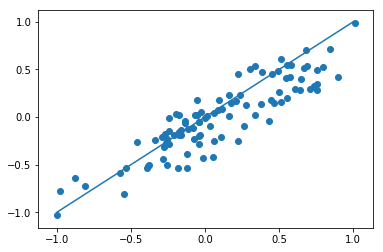

In [7]:
plt.plot([-1,1],[-1,1])
plt.scatter(w0,w)

## SVD based

In [28]:
u,s,vt = np.linalg.svd(c, full_matrices=True)

In [29]:
print(u.shape,s.shape,vt.shape)

((100, 100), (100,), (100, 100))


In [30]:
s

array([2.85477773e-01, 2.74550390e-01, 2.73335713e-01, 2.71239915e-01,
       2.67801642e-01, 2.66022121e-01, 2.62589959e-01, 2.59818414e-01,
       2.57852820e-01, 2.55474563e-01, 2.52627476e-01, 2.47548816e-01,
       2.46347149e-01, 2.45543987e-01, 2.44504222e-01, 2.41459891e-01,
       2.37579277e-01, 2.36110445e-01, 2.33391924e-01, 2.32065668e-01,
       2.30102754e-01, 2.28871547e-01, 2.28421987e-01, 2.24982054e-01,
       2.22971508e-01, 2.20189509e-01, 2.17845076e-01, 2.16403684e-01,
       2.13285576e-01, 2.12924554e-01, 2.11871206e-01, 2.10138678e-01,
       2.08567942e-01, 2.06984751e-01, 2.06096486e-01, 2.05557333e-01,
       2.03382459e-01, 2.00120761e-01, 1.98462316e-01, 1.98363218e-01,
       1.95026809e-01, 1.94314175e-01, 1.92981270e-01, 1.91603376e-01,
       1.90856268e-01, 1.89365670e-01, 1.86971758e-01, 1.86611134e-01,
       1.83183775e-01, 1.82449928e-01, 1.80170144e-01, 1.79173982e-01,
       1.77895234e-01, 1.76618561e-01, 1.76281948e-01, 1.74830634e-01,
      

In [31]:
s_inv = s.copy()
s_zeros = np.isclose(s_inv,0)
s_inv[s_zeros] = 0
s_inv[~s_zeros] = 1./s_inv[~s_zeros]
c_inv = np.multiply(vt.T,s_inv)
c_inv = c_inv.dot(u.T)

In [32]:
s_inv

array([3.50289968, 3.64231862, 3.65850473, 3.68677302, 3.73410706,
       3.75908589, 3.80821873, 3.8488419 , 3.87818136, 3.91428403,
       3.95839762, 4.03960728, 4.05931225, 4.07259006, 4.08990893,
       4.14147458, 4.20912133, 4.23530606, 4.28463839, 4.30912512,
       4.34588453, 4.36926308, 4.37786228, 4.44479896, 4.48487796,
       4.54154244, 4.5904182 , 4.62099343, 4.68854959, 4.69649921,
       4.71984852, 4.75876221, 4.79460069, 4.83127377, 4.85209631,
       4.8648228 , 4.91684488, 4.9969828 , 5.03873994, 5.0412572 ,
       5.12750018, 5.14630496, 5.18185003, 5.21911472, 5.23954497,
       5.28078822, 5.34840135, 5.35873707, 5.45899876, 5.48095585,
       5.55030917, 5.58116748, 5.62128606, 5.66191907, 5.6727306 ,
       5.71982137, 5.78779258, 5.83600408, 5.86641462, 6.01725833,
       6.03329831, 6.08536142, 6.1857999 , 6.23677757, 6.29728531,
       6.30848139, 6.44624639, 6.47849149, 6.5225733 , 6.57329106,
       6.73496866, 6.80271285, 6.84467833, 6.94897989, 7.01522

In [13]:
w = c_inv.dot(dhdx_av)

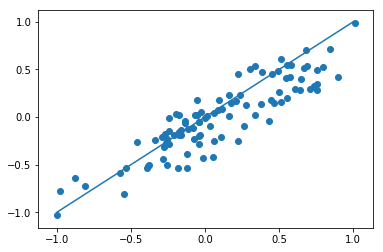

In [14]:
plt.plot([-1,1],[-1,1])
plt.scatter(w0,w)

In [17]:
from scipy.sparse.linalg import svds

In [23]:
u,s,vt = svds(c, k=x.shape[1]-n)
print(u.shape,s.shape,vt.shape)

((100, 80), (80,), (80, 100))


In [24]:
s

array([0.13052647, 0.13345815, 0.13534533, 0.13880507, 0.14200657,
       0.14254701, 0.14390601, 0.1460989 , 0.14700018, 0.14847879,
       0.1521308 , 0.15331372, 0.15435692, 0.15512904, 0.15851676,
       0.15879859, 0.16033921, 0.16166058, 0.16432878, 0.16574682,
       0.16618864, 0.17046187, 0.17135012, 0.17277744, 0.17483063,
       0.17628195, 0.17661856, 0.17789523, 0.17917398, 0.18017014,
       0.18244993, 0.18318378, 0.18661113, 0.18697176, 0.18936567,
       0.19085627, 0.19160338, 0.19298127, 0.19431417, 0.19502681,
       0.19836322, 0.19846232, 0.20012076, 0.20338246, 0.20555733,
       0.20609649, 0.20698475, 0.20856794, 0.21013868, 0.21187121,
       0.21292455, 0.21328558, 0.21640368, 0.21784508, 0.22018951,
       0.22297151, 0.22498205, 0.22842199, 0.22887155, 0.23010275,
       0.23206567, 0.23339192, 0.23611045, 0.23757928, 0.24145989,
       0.24450422, 0.24554399, 0.24634715, 0.24754882, 0.25262748,
       0.25547456, 0.25785282, 0.25981841, 0.26258996, 0.26602

In [25]:
s_inv = s.copy()
s_zeros = np.isclose(s_inv,0)
s_inv[s_zeros] = 0
s_inv[~s_zeros] = 1./s_inv[~s_zeros]
c_inv = np.multiply(vt.T,s_inv)
c_inv = c_inv.dot(u.T)

In [26]:
w = c_inv.dot(dhdx_av)

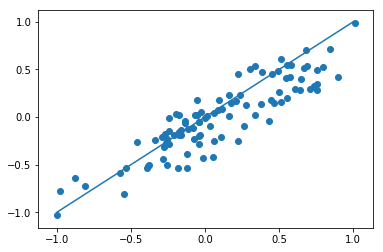

In [27]:
plt.plot([-1,1],[-1,1])
plt.scatter(w0,w)

In [ ]:
u,s,vt = svds(c, k=x.shape[1]-n)
print(u.shape,s.shape,vt.shape)